In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from pathlib import Path
import os

from gensim.models import Word2Vec as w2v

from tqdm import tqdm

from collections import Counter

In [2]:
path = Path('/home/khoa-ys/Projects/NLP Project')
data_path = path/'data'
os.listdir(data_path)

['spam_sport.csv',
 'text_sports.csv',
 'Home_and_Kitchen.json',
 'models',
 'spam_sports.csv_tok',
 'spam_sports.csv',
 'Home_and_Kitchen extra.json',
 'Sports_and_Outdoors.csv',
 'Sports_and_Outdoors extra.json',
 'Sports_and_Outdoors extra.csv',
 'Sports_and_Outdoors.json',
 'text_sports_balanced.csv',
 '.ipynb_checkpoints',
 'text_sports_test.csv',
 'spam_sports_test.csv',
 'spam_sports_balanced.csv']

In [3]:
data = pd.read_csv(data_path/'spam_sports.csv')
data = data.dropna()
print(pd.isna(data).sum())
data

Processed Text    0
class             0
dtype: int64


,Processed Text,class
0,might use dirty rust real alice clip appear mi...,0.0
1,accurate shot like old school iron site remova...,1.0
2,great present niece love ride ride come assemb...,1.0
3,great watch nice seiko watch easy read day dat...,1.0
4,safe wad value price comfortable use wad boot ...,1.0
...,...,...
17541,reach hard clean spot fabulous brush set get p...,1.0
17542,work great item work great pitcher purchase so...,1.0
17543,bad price come one size unfortunately need big...,0.0
17544,five star big well worth money,0.0


# EDA

<AxesSubplot:>

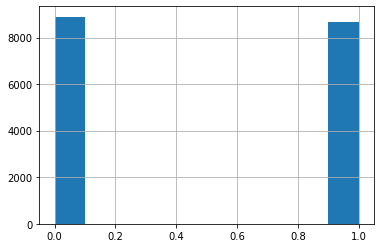

In [4]:
data['class'].hist()

## Embed with Tf-idf

In [5]:
vectorizer = TfidfVectorizer(lowercase = True, ngram_range = (1, 2), min_df = 0.01, max_df = 0.95, norm = 'l2')
tf_idf_matrix = vectorizer.fit_transform(data["Processed Text"])
tf_idf_table = pd.DataFrame(tf_idf_matrix.toarray(), columns = vectorizer.get_feature_names())
tf_idf_table

/home/khoa-ys/Projects/NLP Project/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,able,absolutely,accurate,actually,add,adjust,adjustment,advertised,ago,air,...,work well,workout,worth,would,would buy,would recommend,wrong,year,year old,yet
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
1,0.0,0.0,0.426636,0.0,0.0,0.0,0.224518,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.106333,0.0,0.174501,0.0,0.136704,0.184588,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17538,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
17539,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
17540,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
17541,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.445336,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0


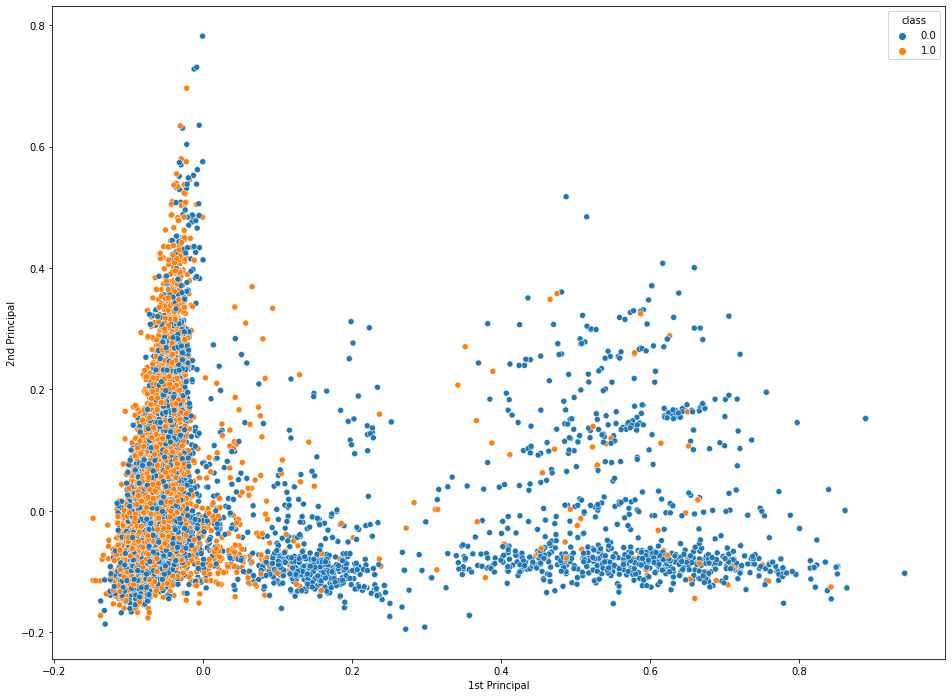

In [6]:
pca = PCA(n_components=2)
pca_tf_idf = pca.fit_transform(tf_idf_matrix.toarray())
plt.figure(figsize=(16, 12))
sns.scatterplot(x=pca_tf_idf[:,0], 
                y=pca_tf_idf[:,1], 
                hue=data['class'].astype(str))
plt.xlabel("1st Principal")
plt.ylabel("2nd Principal")
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 17543 samples in 0.005s...
[t-SNE] Computed neighbors for 17543 samples in 7.287s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17543
[t-SNE] Computed conditional probabilities for sample 2000 / 17543
[t-SNE] Computed conditional probabilities for sample 3000 / 17543
[t-SNE] Computed conditional probabilities for sample 4000 / 17543
[t-SNE] Computed conditional probabilities for sample 5000 / 17543
[t-SNE] Computed conditional probabilities for sample 6000 / 17543
[t-SNE] Computed conditional probabilities for sample 7000 / 17543
[t-SNE] Computed conditional probabilities for sample 8000 / 17543
[t-SNE] Computed conditional probabilities for sample 9000 / 17543
[t-SNE] Computed conditional probabilities for sample 10000 / 17543
[t-SNE] Computed conditional probabilities for sample 11000 / 17543
[t-SNE] Computed conditional probabilities for sample 12000 / 17543
[t-SNE] Computed conditional probabilities for sam

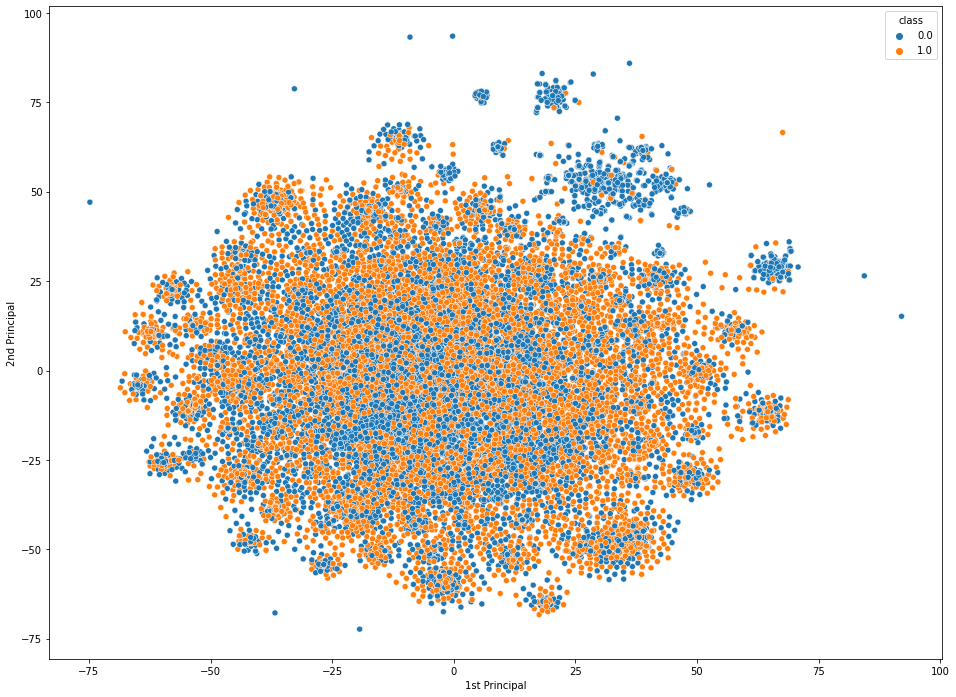

In [7]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', verbose=1)
tsne_tf_idf = tsne.fit_transform(tf_idf_matrix.toarray())
plt.figure(figsize=(16, 12))
sns.scatterplot(x=tsne_tf_idf[:,0], 
                y=tsne_tf_idf[:,1], 
                hue=data['class'].astype(str))
plt.xlabel("1st Principal")
plt.ylabel("2nd Principal")
plt.show()

## Embed with Word2vec

In [8]:
words_in_sentences=[]
for i in tqdm(range(len(data))):
    text = data.iloc[i, 0]
    words_in_sentences.append(text.split())
words_in_sentences[0]

100%|██████████████████████████████████| 17543/17543 [00:00<00:00, 58670.22it/s]


['might',
 'use',
 'dirty',
 'rust',
 'real',
 'alice',
 'clip',
 'appear',
 'might',
 'use',
 'dirty',
 'rust',
 'likley',
 'brand',
 'new',
 'store',
 'correctly',
 'per',
 'package',
 'import',
 'vietnam',
 'work',
 'fine']

In [9]:
w = w2v(sentences=words_in_sentences,vector_size = 600)
vocab=list(w.wv.key_to_index.keys())
vocab[:10]

['great', 'use', 'get', 'good', 'well', 'one', 'work', 'like', 'would', 'make']

In [10]:
def avg_w2vec(sentences):
    transformed=[]
    for sentence in tqdm(sentences):
        count=0
        vector=np.zeros(600)
        for word in sentence.split():
            if word in vocab:
                vector+=w.wv.get_vector(word)
                count+=1
        if count!=0:
            vector/=count
            transformed.append(vector)
        else:
            print(sentence)
    return np.array(transformed)

vec_data = avg_w2vec(list(data['Processed Text']))
vec_data

100%|███████████████████████████████████| 17543/17543 [00:05<00:00, 3000.84it/s]


array([[ 0.10401575, -0.03050171,  0.07451121, ..., -0.08742729,
         0.00986464, -0.06003246],
       [ 0.12805366,  0.00264428,  0.05972899, ..., -0.08903658,
        -0.01696163,  0.00995374],
       [ 0.1369718 ,  0.08023887,  0.09307424, ..., -0.10328574,
         0.01102283,  0.01230334],
       ...,
       [ 0.09699445, -0.073655  ,  0.11832077, ..., -0.03721768,
         0.03572048, -0.17216274],
       [ 0.19148485,  0.03780698,  0.10951311, ..., -0.32500808,
        -0.00285816, -0.21268917],
       [ 0.11193755, -0.02085616,  0.11846407, ..., -0.08729997,
        -0.00270644, -0.07015451]])

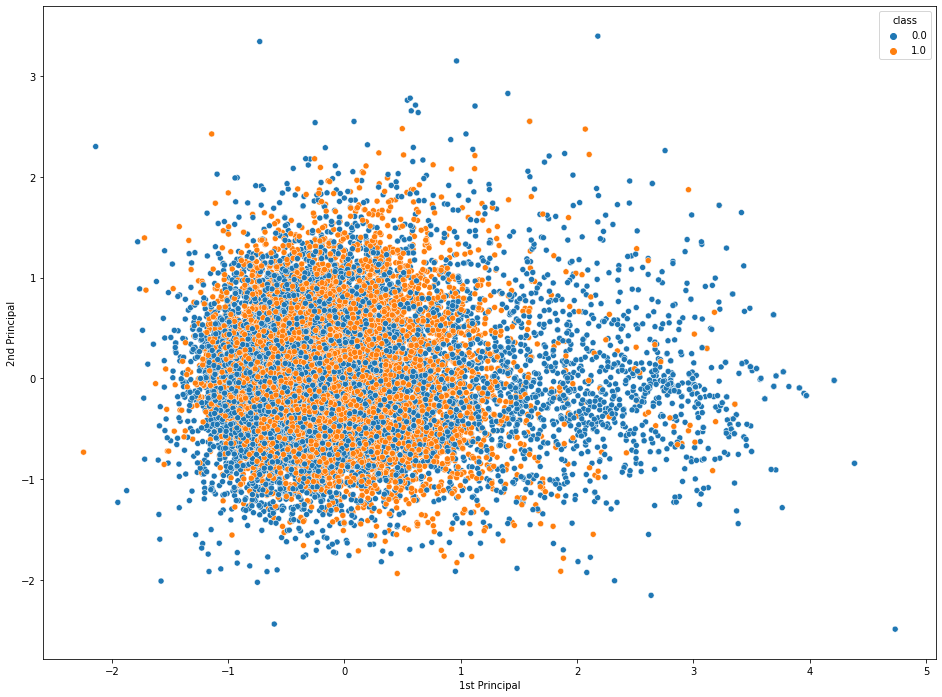

In [11]:
pca_tf_idf = pca.fit_transform(vec_data)
plt.figure(figsize=(16, 12))
sns.scatterplot(x=pca_tf_idf[:,0], 
                y=pca_tf_idf[:,1], 
                hue=data['class'].astype(str))
plt.xlabel("1st Principal")
plt.ylabel("2nd Principal")
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 17543 samples in 0.005s...
[t-SNE] Computed neighbors for 17543 samples in 7.197s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17543
[t-SNE] Computed conditional probabilities for sample 2000 / 17543
[t-SNE] Computed conditional probabilities for sample 3000 / 17543
[t-SNE] Computed conditional probabilities for sample 4000 / 17543
[t-SNE] Computed conditional probabilities for sample 5000 / 17543
[t-SNE] Computed conditional probabilities for sample 6000 / 17543
[t-SNE] Computed conditional probabilities for sample 7000 / 17543
[t-SNE] Computed conditional probabilities for sample 8000 / 17543
[t-SNE] Computed conditional probabilities for sample 9000 / 17543
[t-SNE] Computed conditional probabilities for sample 10000 / 17543
[t-SNE] Computed conditional probabilities for sample 11000 / 17543
[t-SNE] Computed conditional probabilities for sample 12000 / 17543
[t-SNE] Computed conditional probabilities for sam

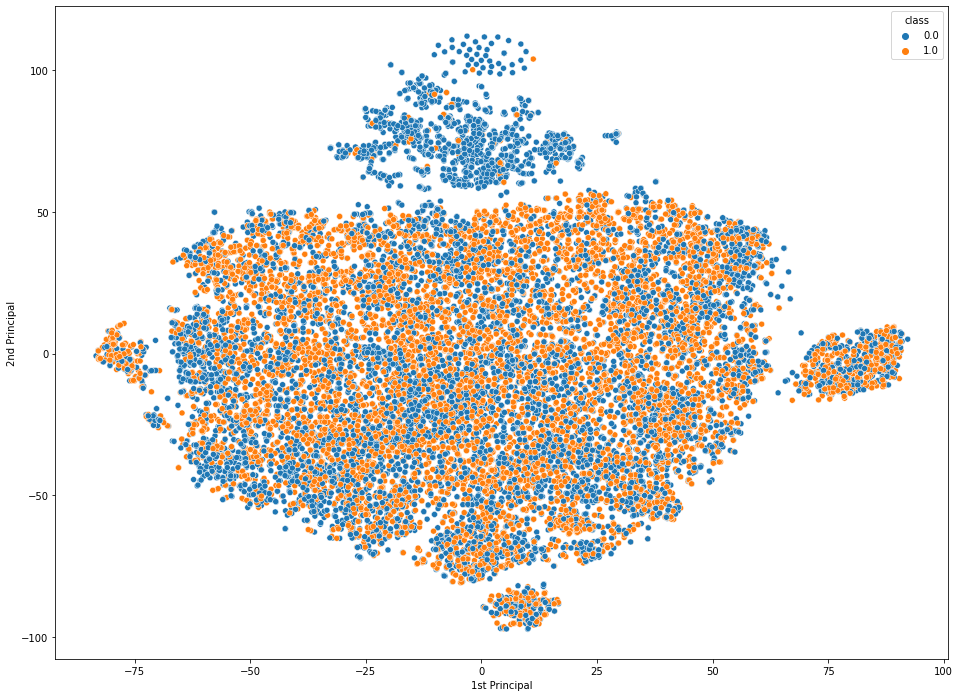

In [12]:
tsne_tf_idf = tsne.fit_transform(vec_data)
plt.figure(figsize=(16, 12))
sns.scatterplot(x=tsne_tf_idf[:,0], 
                y=tsne_tf_idf[:,1], 
                hue=data['class'].astype(str))
plt.xlabel("1st Principal")
plt.ylabel("2nd Principal")
plt.show()

## Common words histogram

### Class spam

In [13]:
spam_data = data[data['class']==1.0]['Processed Text'].tolist()
spam_data = [word for sentence in spam_data for word in sentence.split()]
spam_counter = Counter(spam_data)
spam_counter = {k: v for k, v in sorted(spam_counter.items(), reverse=True, key=lambda item: item[1])}
common_spam_counter = pd.DataFrame(list(spam_counter.items())[:20], columns = ['word', 'counter'])
common_spam_counter

,word,counter
0,great,5314
1,use,3491
2,well,2958
3,good,2956
4,get,2930
5,one,2734
6,like,2460
7,work,2383
8,love,2133
9,make,2079


<AxesSubplot:xlabel='word', ylabel='counter'>

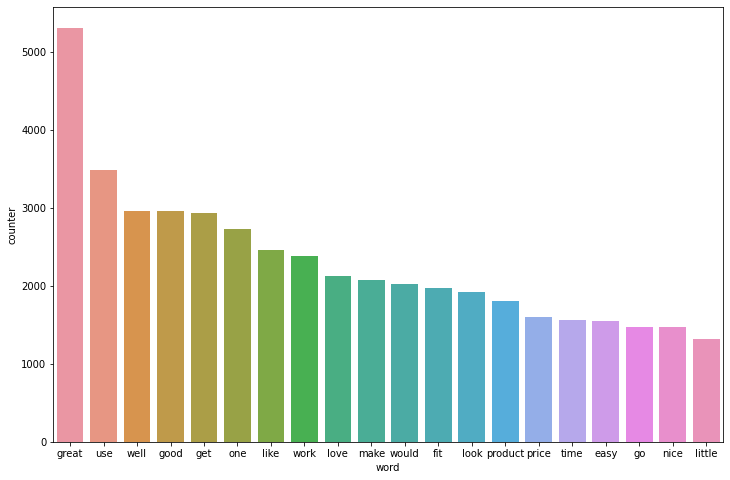

In [14]:
plt.figure(figsize=(12,8))
sns.barplot(data=common_spam_counter, x='word', y='counter')

### Class non-spam

In [15]:
ham_data = data[data['class']==0.0]['Processed Text'].tolist()
ham_data = [word for sentence in ham_data for word in sentence.split()]
ham_counter = Counter(ham_data)
ham_counter = {k: v for k, v in sorted(ham_counter.items(), reverse=True, key=lambda item: item[1])}
common_ham_counter = pd.DataFrame(list(ham_counter.items())[:20], columns = ['word', 'counter'])
common_ham_counter

,word,counter
0,great,3321
1,use,3173
2,get,2631
3,good,2517
4,work,2491
5,one,2462
6,well,2294
7,star,1935
8,like,1829
9,would,1791


<AxesSubplot:xlabel='word', ylabel='counter'>

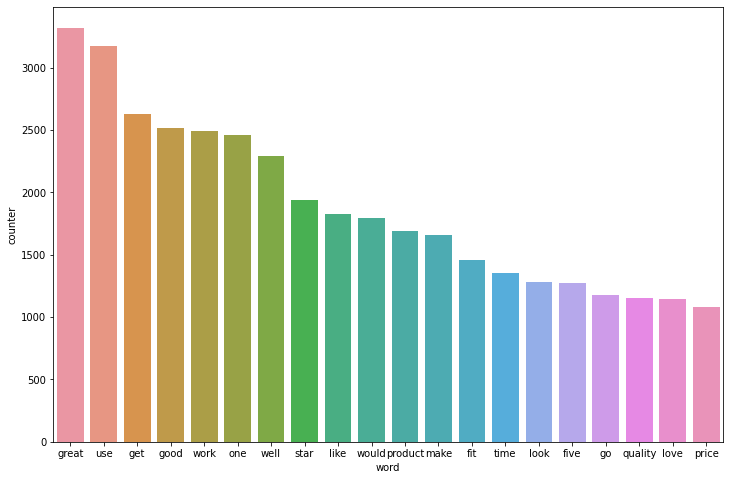

In [16]:
plt.figure(figsize=(12,8))
sns.barplot(data=common_ham_counter, x='word', y='counter')

<AxesSubplot:xlabel='word', ylabel='value'>

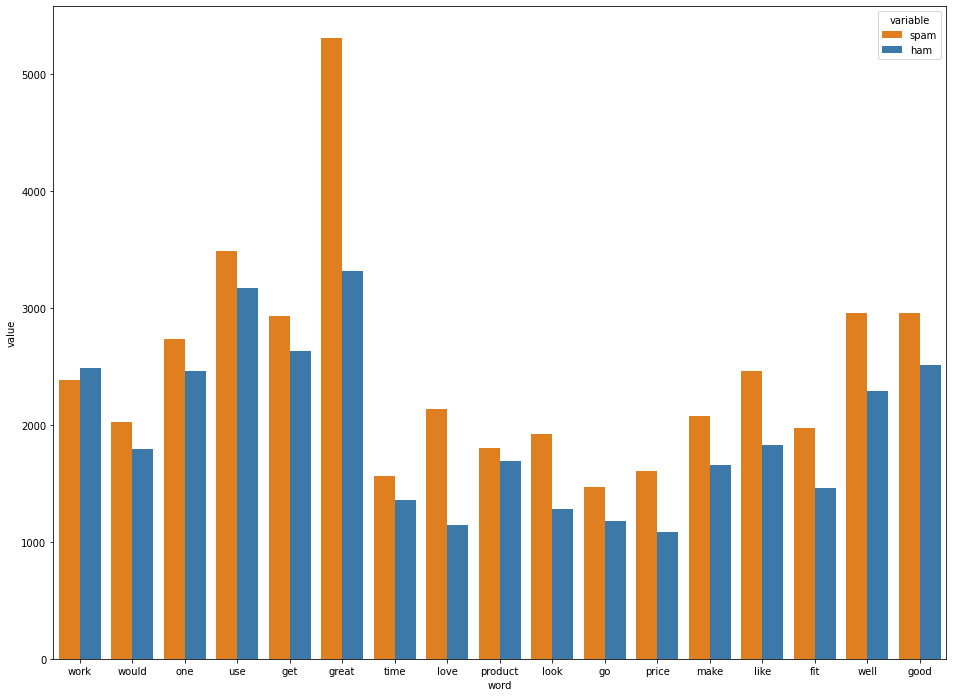

In [17]:
common_words = list(set(common_spam_counter.word) & (set(common_ham_counter.word)))
word_list = common_words

temp0 = common_spam_counter[common_spam_counter.word.isin(word_list)]
temp0 = temp0.set_index(temp0.word).loc[word_list]

temp1 = common_ham_counter[common_ham_counter.word.isin(word_list)]
temp1 = temp1.set_index(temp1.word).loc[word_list]

common_words = pd.DataFrame(columns=['spam', 'ham'], index=word_list)
common_words['ham'] = temp1.counter
common_words['spam'] = temp0.counter
common_words = common_words.melt()
common_words['word'] = word_list+word_list
common_words

plt.figure(figsize=(16, 12))
sns.barplot(data=common_words, x='word', y='value', hue='variable', palette=[sns.color_palette("Paired")[7], sns.color_palette("Blues")[4]])